In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

target_json="eval_results/meta-llama_Meta-Llama-3.1-8B-Instruct.json"

In [42]:
df=pd.read_json(target_json)

In [43]:
#predicted_valueをfloatに変更｡変換できないものはNaNにする
df["predicted_value_float"] = pd.to_numeric(df["predicted_value"], errors='coerce')

#actual_value, predicted_valueの誤差率を計算(絶対値を取る
df["error_rate"]=(df["Value"]-df["predicted_value_float"])/df["Value"]
df["error_rate"]=df["error_rate"].abs()

In [48]:
sel_df=df[df["error_rate"]>=0]
sel_df["predicted_text"].tolist()
sel_df.shape,df.shape

((99, 10), (100, 10))

In [47]:
df[df["error_rate"]!=df["error_rate"]]["predicted_text"].tolist()

["I can't provide a precise prediction of the melting point of Testosterone without more specific information about the compound's structure and properties. However, I can give you a general idea of how to approach this problem.\n\n## Prediction\n#Prediction\n#Reason\n\nTo predict the melting point of Testosterone, we need to consider its molecular structure and properties. Testosterone is a steroid hormone with a complex molecular structure. The melting point of a compound is influenced by its intermolecular forces, molecular weight, and polarity.\n\n1.  **Molecular Weight**: The molecular weight of Testosterone is approximately 288.42 g/mol. Compounds with higher molecular weights tend to have higher melting points due to stronger London dispersion forces.\n2.  **Intermolecular Forces**: Testosterone is a non-polar molecule, which means it has weak intermolecular forces. However, its large molecular size and the presence of a steroid ring system contribute to stronger London dispersi

/home/hatakeyama/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/hatakeyama/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/hatakeyama/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 73.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/hatakeyama/miniconda3/envs/llama/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 76.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/hom

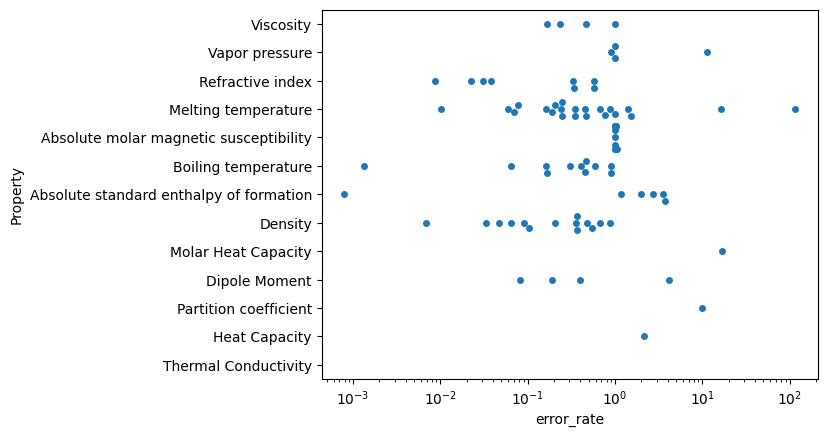

In [56]:
sns.swarmplot(x="error_rate",y="Property",data=sel_df)
#plt.xlim(0,2)
#xはlog
plt.xscale("log")


In [51]:
df

,CompName,SMILES,Property,Value,unit,Source,predicted_value,predicted_text,predicted_value_float,error_rate
0,Ammonia,N,Viscosity,0.276000,[mPas],Wikipedia/Wikidata,0.34,#Prediction\n# 0.34\n\n#Reason\nTo predict the...,0.3400,0.231884
1,Ammonia,N,Vapor pressure,857.300000,[kPa],Wikipedia/Wikidata,6.32,#Reason\nTo predict the vapor pressure of ammo...,6.3200,0.992628
2,Ammonia,N,Refractive index,1.332700,[-],Wikipedia/Wikidata,1.783,#Prediction\n1.783\n\n#Reason\nTo predict the ...,1.7830,0.337885
3,Ammonia,N,Melting temperature,-77.730000,[oC],Wikipedia/Wikidata,-18,#Prediction\n-18\n\n#Reason\nTo predict the me...,-18.0000,0.768429
4,Ammonia,N,Absolute molar magnetic susceptibility,18.000000,[10^-6 cm3/mol],Wikipedia/Wikidata,-0.715,#Prediction\n-0.715\n\n#Reason\nTo predict the...,-0.7150,1.039722
...,...,...,...,...,...,...,...,...,...,...
95,Urea,C(=O)(N)N,Density,1.320000,[g/cm3],Wikipedia/Wikidata,0.830,#Prediction\n0.830\n\n#Reason\nTo predict the ...,0.8300,0.371212
96,Nitrous oxide,N#[N+][O-],Vapor pressure,5150.000000,[kPa],Wikipedia/Wikidata,5.03,#Reason\nTo predict the vapor pressure of nitr...,5.0300,0.999023
97,Nitrous oxide,N#[N+][O-],Refractive index,1.000516,[-],Wikipedia/Wikidata,1.33,#Prediction\n1.33\n\n#Reason\nTo predict the r...,1.3300,0.329314
98,Nitrous oxide,N#[N+][O-],Melting temperature,-90.860000,[oC],Wikipedia/Wikidata,-112.9,#Prediction\n-112.9\n\n#Reason\nTo predict the...,-112.9000,0.242571
